# Trabalho Machine Learning

- Vinicius Santos Monteiro - 11932463

## Tarefa e conjunto de dados
Estaremos trabalhando com um conjunto de dados de [detecção de Fraude em transações de cartão de crédito](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code?datasetId=310&searchQuery=Eda). O dataset contém dados de transações feitas por cartão de crédito por europeus em setembro de 2013.

O conjunto de dados conta com 28 váriaveis explicativas. Todas essas variáveis são numéricas e **anonimizadas** de forma que não conseguimos ter um entendimento completo dessas variáveis. Além disso o dataset conta com a variável resposta 'Class' que é uma variável booleana em que o valor 0 indica uma transação não fraudulenta enquanto que o valor 1 indica fraude em uma transação.

## Detecção de fraudes
A análise e detecção de fraudes em transações de cartão de crédito são de extrema importância no contexto atual, onde o uso de cartões de crédito e débito é uma prática cotidiana para a maioria das pessoas. As fraudes representam um desafio significativo tanto para consumidores quanto para instituições financeiras.

Fraudes em transações de cartão de crédito resultam em perdas financeiras substanciais para consumidores e instituições financeiras. Estima-se que fraudes com cartões de crédito causem bilhões de dólares em prejuízos anuais globalmente. Além disso, fraudes podem levar a sérios problemas para os consumidores, incluindo o comprometimento de dados pessoais, estresse emocional e complicações financeiras. Sistemas eficazes de detecção de fraudes protegem os consumidores contra o uso não autorizado de suas informações financeiras, proporcionando maior segurança e confiança no uso de cartões de crédito.

Nosso projeto se torna pertinente pois aborda um problema de grande impacto socioeconômico, utilizando técnicas avançadas de aprendizado de máquina para melhorar a detecção de fraudes em transações de cartão de crédito. Utilizando o conjunto de dados de transações de cartão de crédito fornecido, que contém 28 variáveis explicativas anonimizadas, o objetivo é desenvolver um modelo preditivo que possa identificar transações fraudulentas com alta precisão.

## Abordagem, materiais e métodos
A detecção de fraudes em transações de cartão de crédito é uma tarefa desafiadora devido à natureza desequilibrada dos dados e à complexidade dos padrões de fraude. Segundo pesquisas recentes, Random Forest é um algoritmo de aprendizado de máquina altamente eficaz para essa tarefa por ser um algoritmo robusto com menos risco de overfitting e menos sensível a variações nos dados de treinamento. Além disso esse modelo é muito bom para lidar com dados desbalanceados, especialmente quando o combinamos com algumas técnicas como oversampling.


# Código

In [1]:
# !kaggle datasets download -d mlg-ulb/creditcardfraud
# !unzip /content/creditcardfraud.zip
# !rm /content/creditcardfraud.zip

In [2]:
# !pip install optuna

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import optuna

# Breve análise do dataset

In [7]:
df = pd.read_csv('creditcard.csv')

df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

A variável Time está em um padrão que não conseguimos fazer um bom uso, pois não conseguimos tirar informações relevantes, por exemplo qual o dia da semana ou o mes em que a transação ocorreu. Dessa forma, iremos descartá - la.

In [10]:
df = df.drop(['Time'], axis=1)

In [11]:
X = df.drop(['Class'], axis=1)
y = df['Class']

Como esperado, o dataset é desbalanceado, com cerca de 280 mil transações não fraudulentas e apenas 492 casos de fraude. Para lidar com esse desequilíbrio extremo, utilizaremos a técnica de oversampling para gerar dados de fraudes de maneira artificial. A técnica que iremos usar é conhecida como SMOTE (Synthetic Minority Over-sampling Technique). SMOTE é uma técnica de oversampling que funciona criando novas instâncias sintéticas da classe minoritária (neste caso, transações fraudulentas) utilizando a técnica do KNN para gerar dados próximos a duas instâncias vizinhas da classe minoritária.

In [12]:
# Verifique a distribuição das classes
print("Distribuição de classes:")
print(np.bincount(y))

Distribuição de classes:
[284315    492]


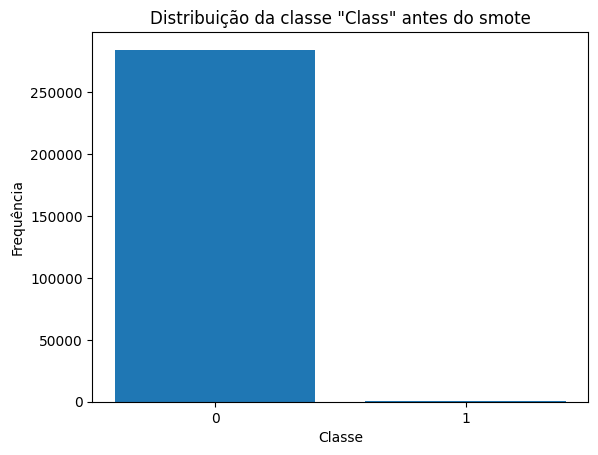

In [13]:
plt.hist(y, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks([0, 1])
plt.title('Distribuição da classe')
plt.show()

In [14]:


sm = SMOTE(sampling_strategy=0.20, random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)



# Verifique a distribuição das classes após o SMOTE
print("Distribuição de classes após o SMote:")
print(np.bincount(y_res))

Distribuição de classes após o SMote:
[284315  56863]


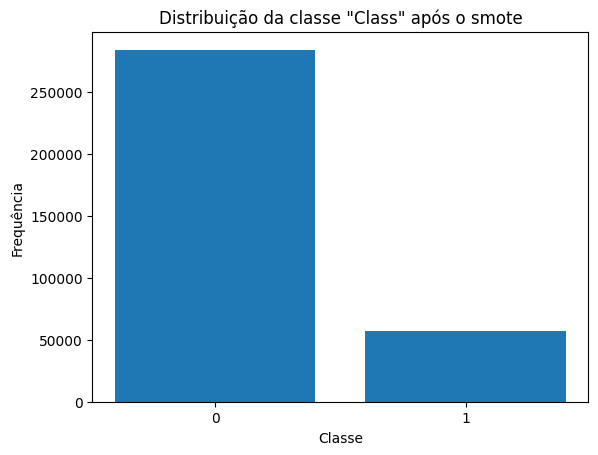

In [15]:


plt.hist(y_res, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8)
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.xticks([0, 1])
plt.title('Distribuição da classe "Class" após o smote')
plt.show()

## Criação do modelo
Com os dados em ordem, iremos criar e treinar nosso modelo. Como já dito anteriormente, iremos utilizar uma Random Forest como modelo e iremos realizar uma otimização de hiperparametros utilizando o optuna.

In [11]:
def objective(trial):
    # Defina os espaços de busca para os hiperparâmetros
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
    # Crie o modelo com os hiperparâmetros sugeridos
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )
    
    # Avalie o modelo usando cross validation
    score = cross_val_score(rf, X_res, y_res, cv=5, n_jobs=-1).mean()
    return score


In [12]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2024-06-03 20:44:43,276] A new study created in memory with name: no-name-0774f12d-1f2a-4fb0-86ac-1fe881af9d38
[I 2024-06-03 20:51:09,744] Trial 7 finished with value: 0.9981153547879058 and parameters: {'n_estimators': 127, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 7 with value: 0.9981153547879058.
[I 2024-06-03 21:01:01,609] Trial 0 finished with value: 0.9985081111926633 and parameters: {'n_estimators': 135, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9985081111926633.
[I 2024-06-03 21:03:07,757] Trial 2 finished with value: 0.9985579384352358 and parameters: {'n_estimators': 155, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9985579384352358.
[I 2024-06-03 21:22:48,276] Trial 1 finished with value: 0.9993141418474488 and parameters: {'n_estimators': 149, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value

In [13]:
print("Melhores parâmetros encontrados:")
print(study.best_params)

print("\nMelhor score obtido:")
print(study.best_value)

Melhores parâmetros encontrados:
{'n_estimators': 297, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1}

Melhor score obtido:
0.9994225895598531


In [17]:
# Melhores parâmetros encontrados pelo Optuna
best_params = study.best_params

In [18]:

best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)



In [24]:
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, n_estimators=297, random_state=42)

In [20]:
y_pred = best_rf.predict(X_test)


## Análise do modelo
Como estamos trabalhando com dados desbalanceados, iremos utilizar a métrica AUC para medir o desempenho do nosso modelo.

In [21]:
auc = roc_auc_score(y_test, y_pred)


print("AUC:")
print(auc)

AUC:
0.9984989672960141


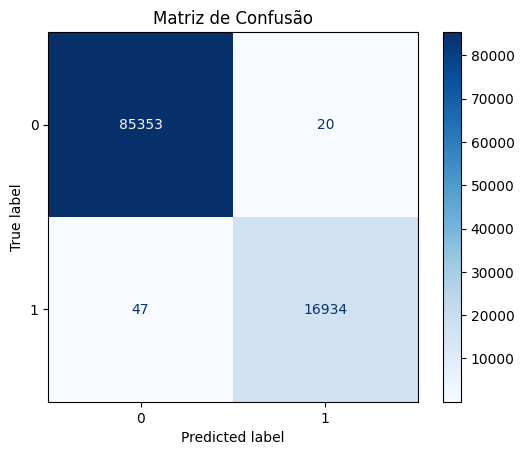

In [23]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

target_names = ['0', '1']

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

## Analise e conclusão

Desempenho do Modelo de Detecção de Fraudes
Apesar de a métrica AUC parecer muito alta, é importante considerar que estamos lidando com transações fraudulentas, onde uma pequena quantidade de erros pode resultar em prejuízos significativos. No entanto, estamos satisfeitos com o valor de auc apresentado e podemos afirmar que nosso modelo teve um bom desempenho. Em um conjunto de cerca de 17 mil transações fraudulentas, nosso modelo falhou em detectar aproximadamente 50 fraudes.

Considerações sobre a Natureza das Fraudes
Transações fraudulentas são eventos raros e representam uma minoria no total de transações. A detecção dessas fraudes é crucial, mas também é necessário equilibrar a precisão do modelo para evitar penalidades desnecessárias para os clientes legítimos.

Erros do Tipo 1 e Tipo 2
Nosso modelo mostrou uma baixa taxa de erros do tipo 1, ou seja, raramente classificou erroneamente uma transação não fraudulenta como fraudulenta. Isso é particularmente importante para instituições financeiras, pois congelar transações legítimas pode levar à insatisfação do cliente e, potencialmente, à perda de clientes.

Impacto do Desempenho do Modelo
Detecção de Fraudes: A falha em detectar aproximadamente 50 fraudes em 17 mil transações é um número relativamente pequeno, dado o grande volume de transações analisadas. No entanto, cada transação fraudulenta não detectada pode resultar em prejuízos financeiros substanciais, destacando a importância de continuar aprimorando a eficácia do modelo.

Minimização de Falsos Positivos: A capacidade do modelo de minimizar falsos positivos (erros do tipo 1) é um ponto forte, pois evita a interrupção de transações legítimas. Isso é essencial para manter a confiança dos clientes e garantir uma experiência de uso suave e sem frustrações.


Por fim, embora a detecção de fraudes seja uma tarefa complexa devido à natureza desequilibrada e ao impacto potencial dos erros, nosso modelo demonstrou um bom desempenho geral. A baixa taxa de falsos positivos é um indicador positivo, pois garante que as transações legítimas não sejam indevidamente afetadas. No entanto, a contínua melhoria do modelo é necessária para reduzir ainda mais a taxa de falsos negativos e minimizar os prejuízos associados a transações fraudulentas não detectadas.